In [69]:
import numpy as np 
import PIL.Image as Image 
import tensorflow as tf 

In [70]:
num_classes = 3
IMAGE_SHAPE = (224, 224)

base_model = tf.keras.applications.MobileNetV2(
    input_shape=IMAGE_SHAPE + (3,),
    # include_top=False,
    weights='imagenet'
)

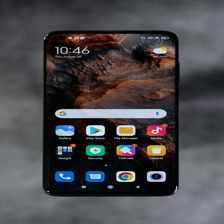

In [71]:
phone = Image.open("phone.jpg").resize(IMAGE_SHAPE)
phone

In [72]:
phone = np.array(phone) / 255.0
phone.shape

(224, 224, 3)

In [73]:
phone

array([[[0.15686275, 0.16078431, 0.16862745],
        [0.16470588, 0.16862745, 0.18039216],
        [0.17254902, 0.17254902, 0.18823529],
        ...,
        [0.29019608, 0.30588235, 0.32941176],
        [0.29411765, 0.30196078, 0.32156863],
        [0.29411765, 0.30588235, 0.32156863]],

       [[0.16078431, 0.16470588, 0.17254902],
        [0.16862745, 0.17254902, 0.17647059],
        [0.17647059, 0.18039216, 0.18431373],
        ...,
        [0.29019608, 0.30980392, 0.32941176],
        [0.29803922, 0.30980392, 0.33333333],
        [0.30196078, 0.31372549, 0.33333333]],

       [[0.16078431, 0.16470588, 0.17254902],
        [0.17254902, 0.17647059, 0.18431373],
        [0.17647059, 0.18039216, 0.19215686],
        ...,
        [0.29411765, 0.31372549, 0.32941176],
        [0.29803922, 0.31764706, 0.34117647],
        [0.30588235, 0.3254902 , 0.34901961]],

       ...,

       [[0.36862745, 0.38039216, 0.4       ],
        [0.36078431, 0.37647059, 0.39215686],
        [0.36470588, 0

In [74]:
phonetf = tf.expand_dims(phone, 0).shape
phonetf

TensorShape([1, 224, 224, 3])

In [75]:
phone[np.newaxis, ...].shape # same as gold_fishtf

(1, 224, 224, 3)

In [76]:
result = base_model.predict(phone[np.newaxis, ...])
result.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(1, 1000)

In [77]:
predicted_class = result[0]
predicted_class

array([6.80926605e-05, 7.43406490e-05, 1.07114160e-04, 1.04270483e-04,
       1.05592944e-05, 2.16564331e-05, 2.34658801e-05, 5.52859710e-05,
       5.84576446e-05, 4.04418315e-05, 3.17911938e-04, 6.05282221e-05,
       3.81777973e-05, 4.46181621e-05, 1.42892939e-04, 2.79370688e-05,
       6.88154614e-05, 7.05702259e-05, 5.21522743e-05, 2.49288041e-05,
       3.88220833e-05, 3.70146263e-05, 3.62485043e-05, 9.76607334e-05,
       3.43038846e-05, 5.82026478e-05, 6.02664913e-05, 4.59881558e-05,
       2.56155676e-04, 3.66645327e-05, 2.84153612e-05, 1.13889701e-05,
       4.87663056e-05, 1.59634110e-05, 1.69665036e-05, 4.00391546e-05,
       2.29430098e-05, 4.48014653e-05, 3.91577778e-05, 1.05585896e-05,
       1.35448581e-05, 9.48797897e-05, 1.39410549e-04, 3.05664958e-04,
       6.55402400e-05, 1.30091968e-04, 1.33121321e-05, 2.84796843e-05,
       1.87623573e-05, 2.18827699e-05, 1.37776433e-05, 9.78371099e-05,
       6.35970646e-05, 3.62786632e-05, 1.87621426e-05, 3.36576231e-05,
      

In [78]:
predicted_class_index = np.argmax(result[0])
print(f"Predicted class index: {predicted_class_index}")

Predicted class index: 605


In [79]:
# The model from TF Hub outputs logits, so we apply softmax to get probabilities
probabilities = tf.nn.softmax(result[0]) # We take the first (and only) item in the batch

# To get the class name, we need the ImageNet labels.
# We can download them directly.
labels_path = tf.keras.utils.get_file(
    'ImageNetLabels.txt',
    'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt'
)
with open(labels_path) as f:
    imagenet_labels = f.read().splitlines()

# The model's output has 1001 classes, where index 0 is "background".
# The labels file has 1000 classes.
# We find the best prediction index among the non-background classes (from index 1 onwards).
# This returns an index from 0-999, which directly corresponds to the correct label in our list.
# predicted_class_index = np.argmax(probabilities[1:]) 
predicted_class_name = imagenet_labels[predicted_class_index]

# Get the confidence score of the top prediction
confidence = np.max(probabilities[1:])
predicted_class_name

'hourglass'

MobileNet have only 1000 classes and trained on various images that's why sometimes it miss-classify images!!!